In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('dielectron.csv')
df.dropna(inplace=True)

X = df[['M', 'pt1']].copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X_scaled)

Text(0, 0.5, 'First Electron Transverse Momentum pt1 (GeV)')

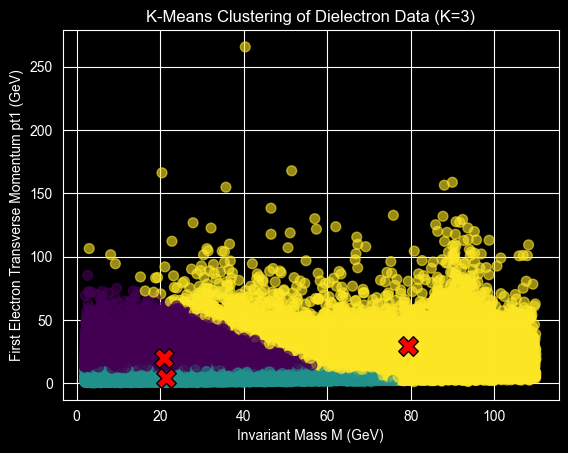

In [11]:
scatter = plt.scatter(df['M'], df['pt1'], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)

centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            marker='X', s=200, c='red', label='Centroids', edgecolors='black')

plt.title(f'K-Means Clustering of Dielectron Data (K=3)')
plt.xlabel('Invariant Mass M (GeV)')
plt.ylabel('First Electron Transverse Momentum pt1 (GeV)')